<a href="https://colab.research.google.com/github/kavanvasani/GRIP/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP Task 1
### Linear Regression
Kavan Vasani


Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fetching the data

In [6]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Visualising the data

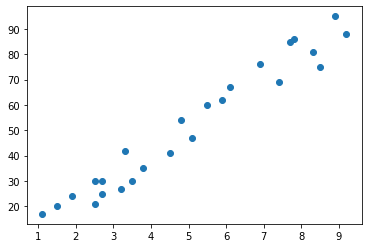

In [8]:
fig , ax = plt.subplots()
ax.scatter(df["Hours"],df["Scores"]);

In [16]:
X = df.drop("Scores",axis = 1)
y = df["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Splitting the data into training and test sets

In [18]:
from sklearn.model_selection import train_test_split  
np.random.seed(28)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
X_train, len(X_train)

(    Hours
 14    1.1
 9     2.7
 6     9.2
 24    7.8
 7     5.5
 15    8.9
 2     3.2
 13    3.3
 8     8.3
 23    6.9
 16    2.5
 18    6.1
 21    4.8
 12    4.5
 3     8.5
 0     2.5
 20    2.7
 22    3.8
 5     1.5
 1     5.1, 20)

In [23]:
y_train.head(), len(y_train)

(14    17
 9     25
 6     88
 24    86
 7     60
 Name: Scores, dtype: int64, 20)

In [24]:
len(X_test),len(y_test)

(5, 5)

Using the Linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression
use = LinearRegression()

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [26]:
use.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualising the best fit

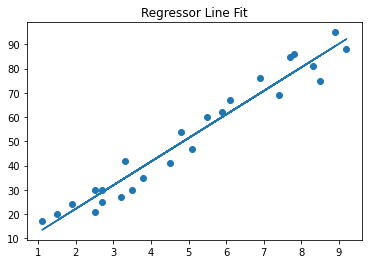

In [31]:
draw = use.coef_*X + use.intercept_
plt.plot(X,draw)
plt.scatter(X,y)
plt.title("Regressor Line Fit")
plt.show();

Making predictions

In [33]:
y_preds = use.predict(X_test)
y_preds

array([77.60629708, 74.69272571, 21.2772506 , 60.12486886, 36.8162979 ])

Comparing the predictions with the actual values

In [34]:
predictions = pd.DataFrame({'Actual':y_test,'Predicted':y_preds})
predictions.head()

,Actual,Predicted
10,85,77.606297
19,69,74.692726
17,24,21.277251
11,62,60.124869
4,30,36.816298


Testing on own data

In [45]:
time = [[9.25],[26]]
my_pred = use.predict(time)
print("Hours :",time[0])
print("Predicted score: ", my_pred[0])

Hours : [9.25]
Predicted score:  92.65974915422066


Evaluating the model

In [44]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_preds))

Mean absolute error:  4.900121415015379
